In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
plt.rcParams["font.family"] = "serif"
plt.rcParams["pdf.fonttype"] = 42
df = pd.read_csv("./parkinsons_updrs.data.csv")
df.describe()

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,2937.000000,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,1696.110747,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,0.000000,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,1468.500000,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,2937.000000,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,4405.500000,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,5874.000000,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [2]:
df["difference"] = df["total_UPDRS"] - df["motor_UPDRS"]
#Remove features
df = df.drop("index", axis=1)
df = df.drop("subject#", axis=1)
df = df.drop("test_time", axis=1)
df = df.drop("total_UPDRS", axis=1)
df = df.drop("sex", axis=1)
df = df.drop("HNR", axis=1)
df = df.drop("Jitter:RAP", axis=1)
df = df.drop("Jitter(%)", axis=1)
df = df.drop("Jitter:PPQ5", axis=1)
df = df.drop("Jitter:DDP", axis=1)
df = df.drop("Shimmer:APQ3", axis=1)
df = df.drop("Shimmer:APQ5", axis=1)
df = df.drop("Shimmer(dB)", axis=1)
df = df.drop("Shimmer:DDA", axis=1)
df = df.drop("Shimmer", axis=1)
df = df.drop("NHR", axis=1)

In [3]:
df.describe()

,age,motor_UPDRS,Jitter(Abs),Shimmer:APQ11,RPDE,DFA,PPE,difference
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,21.296229,0.000044,0.027481,0.541473,0.653240,0.219589,7.722714
std,8.821524,8.129282,0.000036,0.019986,0.100986,0.070902,0.091498,3.973699
min,36.000000,5.037700,0.000002,0.002490,0.151020,0.514040,0.021983,0.025100
25%,58.000000,15.000000,0.000022,0.015665,0.469785,0.596180,0.156340,5.144000
50%,65.000000,20.871000,0.000035,0.022710,0.542250,0.643600,0.205500,7.188000
75%,72.000000,27.596500,0.000053,0.032715,0.614045,0.711335,0.264490,9.681000
max,85.000000,39.511000,0.000446,0.275460,0.966080,0.865600,0.731730,20.931000


# Create the variable where you want to create a regressor, *age*.

In [4]:
Y = df["age"]
X = df.drop("age", axis=1)

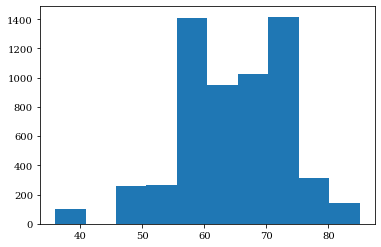

In [5]:
plt.hist(Y);

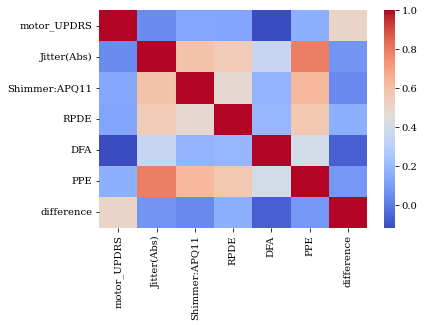

In [6]:
cor_matrix = X.corr()
sns.heatmap(cor_matrix, annot=False, cmap = "coolwarm");

In the following cell, we will follow the methodology used from David Landup in https://stackabuse.com/scikit-learns-traintestsplit-training-testing-and-validation-sets/. 

"To split the data proportionally into a training, testing and validation set - we need to set the $test$ argument to"
$$
test = \frac{validation}{train+test}.
$$

This will allow for the creation of the $train$, $validation$, and $test$ dataset to be seperated into specified sizes.

In [7]:
# Split the data into train, validation, and test sets
train_ratio = 0.70
test_ratio = 0.15
validation_ratio = 0.15

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_ratio)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=validation_ratio/(train_ratio+test_ratio))


In [8]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
X_test.to_csv('test.csv', index=False)

(4111, 7)
(882, 7)
(882, 7)


# Generate the Models.

## Linear Regression.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_valid)

mse = mean_squared_error(Y_valid, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_valid, pred)

print("RMSE: {:.3f}".format(rmse))
print("MAE: {:.3f}".format(mae))

RMSE: 8.335
MAE: 6.557


## Decision Tree Regressor.

In [9]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
# create a grid search object

param_grid = {
    "criterion": ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
    'max_depth': [5, 10, 15]
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5)

# fit the grid search object to the training data
grid_search.fit(X_train, Y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# create a new random forest regressor with the best hyperparameters
dt_model = DecisionTreeRegressor(max_depth=best_params['max_depth'], criterion=best_params["criterion"])

# fit the model to the training data
dt_model.fit(X_train, Y_train)

# generate predictions on the training data
dt_train_pred = dt_model.predict(X_train)

# evaluate the model on the validation data
dt_valid_pred = dt_model.predict(X_valid)

rmse_dt = mean_squared_error(Y_valid, dt_valid_pred, squared=False)
mae_dt = mean_absolute_error(Y_valid, dt_valid_pred)
#accuracy = accuracy_score(Y_valid, dt_valid_pred)

print("Best Hyperparameters: ", best_params)
print("Validation RMSE: {:.3f}".format(rmse_dt))
print("Validation MAE: {:.3f}".format(mae_dt))

Best Hyperparameters:  {'criterion': 'absolute_error', 'max_depth': 15}
Validation RMSE: 4.297
Validation MAE: 1.352


## Random Forest Regressor.

In [10]:
# create a random forest regressor object
rf_model = RandomForestRegressor()

# define the grid search parameters
param_grid = {
    "criterion": ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 15]
}

# create a grid search object
grid_search = GridSearchCV(rf_model, param_grid, cv=5)

# fit the grid search object to the training data
grid_search.fit(X_train, Y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# create a new random forest regressor with the best hyperparameters
rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], criterion=best_params["criterion"])

# fit the model to the training data
rf_model.fit(X_train, Y_train)

# generate predictions on the training data
rf_train_pred = rf_model.predict(X_train)

# evaluate the model on the valid data
rf_valid_pred = rf_model.predict(X_valid)

rmse_rf = mean_squared_error(Y_valid, rf_valid_pred, squared=False)
mae_rf = mean_absolute_error(Y_valid, rf_valid_pred)

print("Best Hyperparameters: ", best_params)
print("Validation RMSE: {:.3f}".format(rmse_rf))
print("Validation MAE: {:.3f}".format(mae_rf))


Best Hyperparameters:  {'criterion': 'friedman_mse', 'max_depth': 15, 'n_estimators': 1000}
Validation RMSE: 2.750
Validation MAE: 1.557


In [ ]:
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=15, criterion='friedman_mse')
rf_model.fit(X_train, Y_train)

# generate predictions on the training data
rf_train_pred = rf_model.predict(X_train)

# evaluate the model on the valid data
rf_valid_pred = rf_model.predict(X_valid)

## Neural Network Regressor.

In [11]:
NN_model = MLPRegressor()
params = {
    'hidden_layer_sizes': [(64,), (32, 16), (64, 32, 16)],
    'max_iter': [500, 1000, 2000],
    'alpha':[0.1, 0.01, 0.001],
    'activation': ['relu', 'tanh', 'logistic']
}

# Perform a grid search over the hyperparameters
grid_search = GridSearchCV(NN_model, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and the associated mean test score
print("Best hyperparameters:", grid_search.best_params_)

# Use the best model to make predictions on the training and testing data
best_model = grid_search.best_estimator_
Y_pred_train = best_model.predict(X_train)
Y_pred_valid = best_model.predict(X_valid)

# Compute the RMSE and MAE for the training and testing data
rmse_valid = mean_squared_error(Y_valid, Y_pred_valid, squared=False)
mae_valid = mean_absolute_error(Y_valid, Y_pred_valid)
print("Validation RMSE: {:.3f}".format(rmse_valid))
print("Validation MAE: {:.3f}".format(mae_valid))


Best hyperparameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (32, 16), 'max_iter': 1000}
Validation RMSE: 8.840
Validation MAE: 7.077


## eXtreme Gradient Boosting (XGB) Regressor.

In [9]:
import xgboost as xgb
#Define the XGBoost model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'colsample_bytree': [0.5, 0.7, 1.0],
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, Y_train, early_stopping_rounds=10, eval_set=[(X_valid, Y_valid)], verbose=False)

# Print the best hyperparameters and the corresponding RMSE
print("Best hyperparameters: ", grid_search.best_params_)
y_train_pred = grid_search.predict(X_train)
y_pred_valid = grid_search.predict(X_valid)
rmse_valid = mean_squared_error(Y_valid, y_pred_valid, squared=False)
mae_valid = mean_absolute_error(Y_valid, y_pred_valid)
print("Validation RMSE: {:.3f}".format(rmse_valid))
print("Validation MAE: {:.3f}".format(mae_valid))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\18145\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Best hyperparameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 1000}


NameError: name 'Y_pred_valid' is not defined

In [10]:
rmse_valid = mean_squared_error(Y_valid, y_pred_valid, squared=False)
mae_valid = mean_absolute_error(Y_valid, y_pred_valid)
print("Validation RMSE: {:.3f}".format(rmse_valid))
print("Validation MAE: {:.3f}".format(mae_valid))

Validation RMSE: 2.780
Validation MAE: 1.655


# Choose Random Forest Regressor.

In [18]:
import pickle

with open('./models/predicition_model.pkl', 'wb') as pickler:
    pickle.dump(rf_model, pickler)